In [1]:
# Python3.6
from eccentric.synthetic import SyntheticFlares, HotJupiterHost
from eccentric.spimodel import SPI_Model

import matplotlib.pyplot as plt
%matplotlib inline

### Create a Hot Jupiter host and a time series observations:

In [2]:

sf = SyntheticFlares(hjhost=HotJupiterHost(period=15, a=1., e=.3, first_periastron_time=7000.,), 
                     #period in days, a in AU, first periastron time must occur after first_observation time...
                     observation_deltat=105, # in days
                     cadence=6, #observations per hour
                     flares_per_day=3, #in days^-1
                     first_observation_time=6999)# day
print("Observation time series: ", sf.observation_time[:5], 
      "\nPoisson parameter for the time series converted from flares_per_day: ", sf.poisson_parameter)

Observation time series:  [6999.         6999.00694444 6999.01388889 6999.02083333 6999.02777778] 
Poisson parameter for the time series converted from flares_per_day:  0.020833333333333332


### Generate some synthetic flares

The default model is a Gaussian distribution at phase $\phi=0.7$, when periastron is at $\phi=0.5$.

In [3]:
phase = .7
sf.generate_synthetic_flares(model="Gauss",
                             size=3, # number of SPI flares per periastron passage
                             width=0.02, # in days (standard deviation)
                             phase=phase) #  can be chosen from 0 to 1


In [4]:
sf.all_flares.tail()

,source,peak_time,stacked_peak_time
15,spi,7032.965278,0.264352
16,spi,7033.020833,0.268056
17,spi,7002.986111,0.265741
18,spi,7003.006944,0.267130
19,spi,7093.020833,0.268056


### Instantiate a model for flaring SPI with given data

In [5]:
spi = SPI_Model(major_axis_a=sf.hjhost.major_axis_a,
                eccentricity=sf.hjhost.eccentricity,
                data=sf.all_flares.stacked_peak_time,
                n_orbits=sf.observation_deltat / sf.hjhost.period)

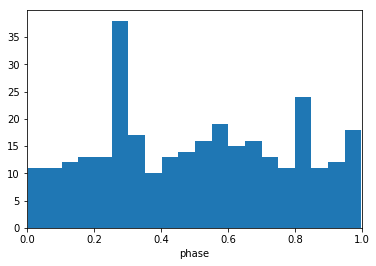

In [6]:
plt.hist(sf.all_flares.stacked_peak_time, bins=20)
plt.xlabel("phase")
plt.xlim(0,1);

In [7]:
spi.estimate_two_parameters()
# gives base intensity and peak scaling factor

(40.05523740059366, 12.67247725172641)

In [8]:
# Wann ist der Peak?
# What if I do not have full periods covered?